In [139]:
import re
import numpy as np
import pandas as pd
import json
from konlpy.tag import Mecab
m = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
df = pd.read_csv('C:/Users/SAMSUNG/NLP_TRY(Final project)/after_최종본/입체형_뉴네퓨어_kf94_대형_after2.csv')
with open('C:/Users/SAMSUNG/NLP_TRY(Final project)/SentiWord_info(2차 수정본).json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)

In [140]:
res = []
for i in range(18569):
    res.append(df['review_content\r'][i])

In [141]:
res = "".join(res)

In [142]:
res = res.replace('!', '.').replace('?', '.').replace('~', '.').replace('\r', '.')

In [143]:
res = res.split('.')

## 착용감

In [144]:
evalution = []
for i in range(len(res)):
    if '착용감' in res[i]:
        evalution.append(res[i])

In [146]:
len(evalution)

380

In [147]:
def eval(review):
    result = []
    word_result = []
    pos = 0
    neg = 0
    word = m.morphs(review)
    
    for j in range(0, len(word)):
        for i in range(0, len(data)):
            if word[j] == data[i]['word_root']:
                result.append(data[i]['polarity'])
                word_result.append(data[i]['word'])
    for i in result:
        if i == 1:
            pos += 1
        elif i == -1:
            neg += 1
            
    return pos, neg, result,word_result
def fomula(pos, neg):
    if pos == 0 and neg == 0:
        return 0
    
    return ((pos - neg) / (pos + neg))

In [148]:
F = []
for i in range(380):
    review = evalution[i]
    
    pos, neg, result, word_result = eval(review)
    F.append(fomula(pos, neg))

In [149]:
F

[0.6,
 -1.0,
 1.0,
 1.0,
 0.7142857142857143,
 1.0,
 1.0,
 -0.52,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.3333333333333333,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 0.8823529411764706,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.05263157894736842,
 0.6,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.25925925925925924,
 -0.2222222222222222,
 0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 -0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.21739130434782608,
 1.0,
 1.0,
 0.0,
 1.0,
 -0.3333333333333333,
 1.0,
 1.0,
 1.0,
 -0.42857142857142855,
 -1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.5294117647058824,
 1.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 -0.5384615384615384,
 0.2,
 1.0,
 1.0,
 1.0,
 0.7391304347826086,
 1.0,
 1.0,
 0.333333333333333

댓글 하나당 점수가 양수이면 긍정적인 댓글, 음수이면 부정적인 댓글로 계산이 된다.
이것을 아래의 함수 에 넣어서, 긍정적인 댓글과 부정적인 댓글의 비율로 계산할 수 있다.

In [150]:
def ration_F(F):
    plus = []
    minus = []
    for i in range(len(F)):
        if F[i] > 0: 
            plus.append(F[i])
        elif F[i] < 0: 
            minus.append(F[i])
    return (len(plus))/(len(plus)+len(minus))*100

In [151]:
ration_F(F)

86.47887323943661

착용감에 관해서 86%의 사람이 편안하다고 느꼈다.

In [296]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


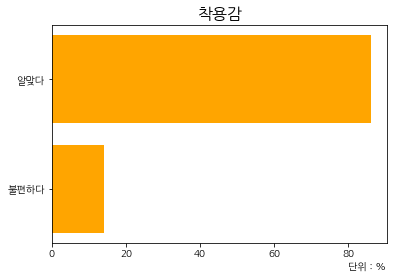

In [314]:
y = np.arange(2)
years = ['불편하다', '알맞다']
values = [14, 86]

plt.title('착용감', fontsize = 16)
plt.barh(y, values, color = 'orange')
plt.xlabel('단위 : %', loc = 'right')
plt.yticks(y, years)

plt.show()

## 호흡

In [152]:
eval_2 = []
for i in range(len(res)):
    if '숨' in res[i]:
        eval_2.append(res[i])

In [154]:
len(eval_2)

765

In [155]:
F = []
for i in range(765):
    review = eval_2[i]
    
    pos, neg, result, word_result = eval(review)
    F.append(fomula(pos, neg))

In [156]:
ration_F(F)

77.72925764192141

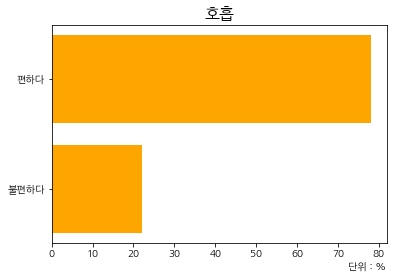

In [315]:
y = np.arange(2)
years = ['불편하다', '편하다']
values = [22, 78]

plt.title('호흡', fontsize = 16)
plt.barh(y, values, color = 'orange')
plt.xlabel('단위 : %', loc = 'right')
plt.yticks(y, years)

plt.show()

## 배송

In [291]:
eval_4 = []
for i in range(len(res)):
    if '배송' in res[i]:
        eval_4.append(res[i])

In [292]:
len(eval_4)

2224

In [293]:
F = []
for i in range(765):
    review = eval_4[i]
    
    pos, neg, result, word_result = eval(review)
    F.append(fomula(pos, neg))

In [294]:
ration_F(F)

95.21739130434783

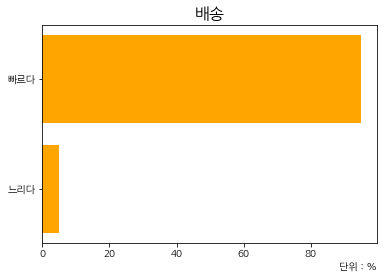

In [316]:
y = np.arange(2)
years = ['느리다', '빠르다']
values = [5, 95]

plt.title('배송', fontsize = 16)
plt.barh(y, values, color = 'orange')
plt.xlabel('단위 : %', loc = 'right')
plt.yticks(y, years)

plt.show()

## 사이즈

In [267]:
eval_3 = []
for i in range(len(res)):
    if '사이즈' in res[i]:
        eval_3.append(res[i])

In [281]:
large = []
small = []
fitted = []
for i in range(len(eval_3)):
    if (('크다' in eval_3[i]) or ('커' in eval_3[i])  or ('큰' in eval_3[i]) or ('큽' in eval_3[i])):
        large.append(eval_3[i])
    elif (('작다' in eval_3[i]) or ('작' in eval_3[i])):
        small.append(eval_3[i])
    elif (('알맞다' in eval_3[i]) or ('잘 맞' in eval_3[i]) or ('적절' in eval_3[i]) or ('맞아요' in eval_3[i])or ('적당' in eval_3[i]) or ('넉넉' in eval_3[i])):
        fitted.append(eval_3[i])

사이즈를 언급한 리뷰 중 핵심 표현을 바탕으로 크다, 작다, 알맞다를 언급한 리뷰들을 모았습니다. 어느 정도 모호한 리뷰들도 있었지만, 대부분 정확히 사이즈의 크기를 언급하였습니다.

In [282]:
len(fitted)

304

In [283]:
len(large)

208

In [284]:
len(small)

47

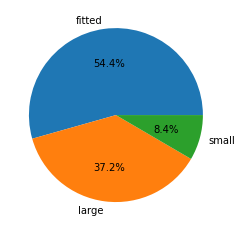

In [288]:
import matplotlib.pyplot as plt

ratio = [304, 208, 47]
labels = ['fitted', 'large', 'small']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()